In [19]:
import os 
from dotenv import load_dotenv
load_dotenv()

True

In [20]:
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ['LANGCHAIN_API_KEY'] = os.getenv('LANGCHAIN_API_KEY')
os.environ['LANGCHAIN_PROJECT'] = 'Langchain - Text Summarization'

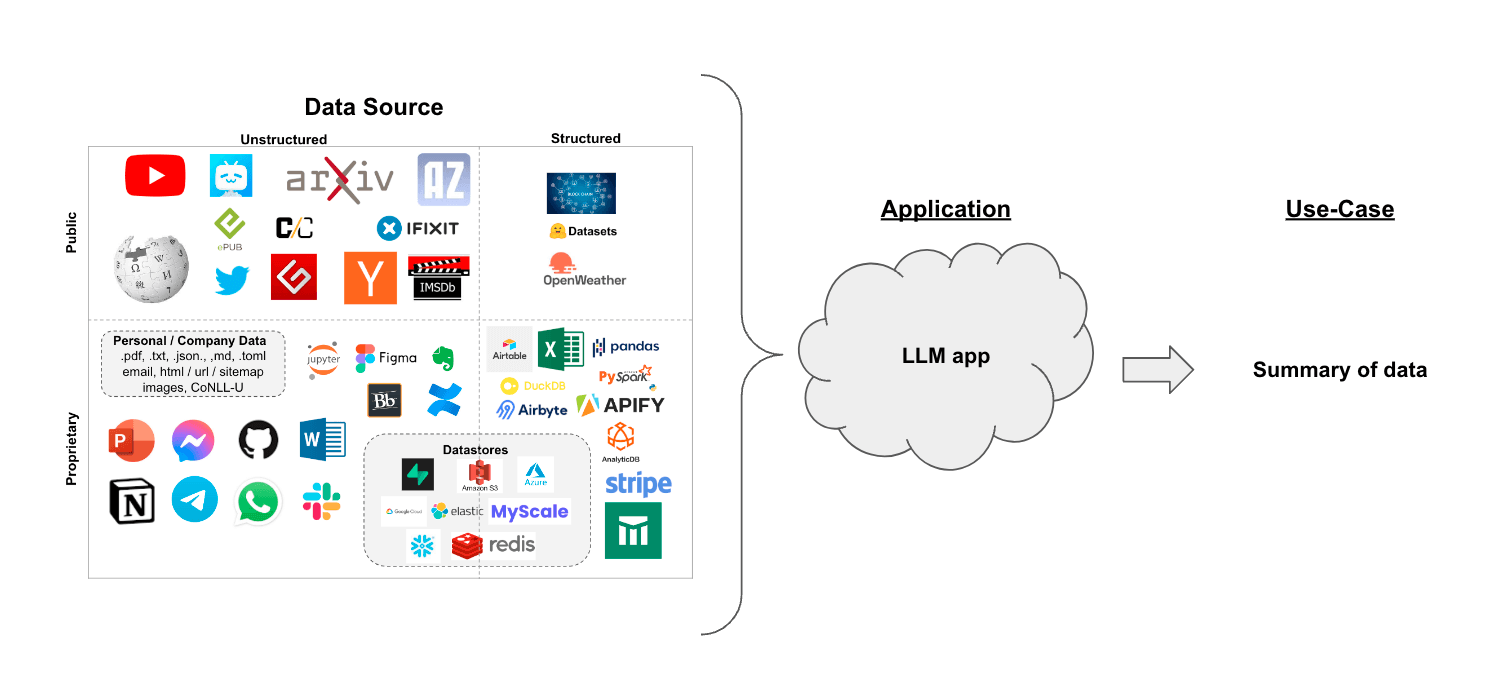

In [21]:
from langchain_groq import ChatGroq
groq_api_key = os.getenv('GROQ_API_KEY')
llm = ChatGroq(groq_api_key = groq_api_key, model = 'llama3-8b-8192')

In [22]:
from langchain.schema import(
    AIMessage,
    HumanMessage,
    SystemMessage
)

In [23]:
speech = """
    Narendra Modi's speech on May 26, 2014, after being sworn in as the Prime Minister of India for the first time, is one of the most significant and iconic addresses in modern Indian history. This speech, delivered at the Central Hall of Parliament, came at a pivotal moment, as the Bharatiya Janata Party (BJP) had just won a resounding mandate in the general elections, marking a shift in the Indian political landscape. Modi's address was not just a speech; it was a declaration of his vision for India, a vision that would guide his government and the nation in the years to come.

    From the outset, Modi's speech was marked by a tone of optimism, inclusiveness, and determination. He emphasized that his government would focus on development and governance, moving away from the divisive and often fractious politics that had characterized much of the previous decades. Modi's mantra, "Sabka Saath, Sabka Vikas" (Together with all, development for all), which he introduced in this speech, became the defining slogan of his government. This phrase encapsulated his vision of inclusive growth, where every section of society, regardless of caste, creed, or religion, would benefit from the nation's progress.

    Modi's emphasis on development was not just a rhetorical flourish; it was the cornerstone of his political ideology. He spoke of the need to create a government that works for the common man, one that is responsive to the needs of the poor, the marginalized, and the underprivileged. In his speech, he highlighted the importance of good governance, stating that his administration would be focused on efficiency, transparency, and accountability. This was a clear departure from the past, where government inefficiency and corruption had often hampered India's development.

    One of the most striking aspects of Modi's speech was his vision of India as a global power. He articulated a roadmap for India's economic transformation, emphasizing the need for economic reforms, infrastructure development, and technological advancement. Modi spoke of making India a manufacturing hub, creating jobs, and attracting foreign investment. He envisioned an India that was not just self-reliant but also a leader on the global stage, contributing to global peace, security, and prosperity.

    Modi's speech also touched upon the aspirations of the Indian people, particularly the youth. He acknowledged that India was a young nation, with a large and dynamic population that was eager for change and progress. Modi promised that his government would work tirelessly to create opportunities for the youth, enabling them to realize their full potential. He spoke of the importance of skill development, education, and entrepreneurship in empowering the youth and driving the nation's economic growth.

    Throughout his speech, Modi reaffirmed his commitment to democracy and the values enshrined in the Indian Constitution. He spoke of his deep respect for India's democratic traditions and institutions, emphasizing that his government would uphold these values while working to strengthen the nation's democratic fabric. Modi's commitment to democracy was also reflected in his call for cooperation and collaboration among all political parties. He urged the opposition to work with the government in the spirit of constructive criticism, to ensure that the government remained accountable and responsive to the needs of the people.

    Another key theme in Modi's speech was the idea of government accountability. He assured the nation that his government would be one that listens to the people, responds to their concerns, and delivers on its promises. Modi emphasized that transparency and efficiency would be the hallmarks of his administration, and that his government would take decisive action against corruption and malpractices. He spoke of the need to restore the people's faith in the government and the political system, which had been eroded by years of inefficiency and corruption.

    Modi's speech was not just about policy and governance; it was also about the emotions and aspirations of the Indian people. He spoke directly to the hearts of millions of Indians who had placed their faith in him and his party. Modi's words were filled with humility, as he acknowledged the enormous responsibility that had been placed on his shoulders. He spoke of his own journey from humble beginnings to the highest office in the land, a journey that resonated with many Indians who saw in Modi a reflection of their own struggles and aspirations.

    In his speech, Modi also addressed the international community, signaling his intent to build strong and mutually beneficial relationships with other nations. He spoke of India's role in the world, not just as a regional power but as a global player. Modi emphasized that India would pursue a foreign policy that was driven by national interest but also guided by the principles of peace, cooperation, and mutual respect. He spoke of strengthening India's ties with its neighbors, deepening its engagement with the global community, and playing a proactive role in addressing global challenges such as terrorism, climate change, and economic inequality.

    Modi's speech on May 26, 2014, was more than just a political address; it was a blueprint for his vision of a new India. It was a speech that captured the hopes and aspirations of a billion people, a speech that promised to usher in an era of transformation and progress. For many Indians, Modi's words represented a break from the past, a promise of a better future where the government would be responsive, efficient, and accountable, where every citizen would have the opportunity to thrive and succeed.

    The speech was also a reflection of Modi's leadership style—decisive, visionary, and inclusive. It set the tone for his government, which would go on to implement a series of bold reforms and initiatives aimed at transforming India into a modern, prosperous, and powerful nation. From the ambitious "Make in India" campaign to the groundbreaking Goods and Services Tax (GST) reform, Modi's government sought to reshape India's economic and political landscape in line with the vision he articulated in his 2014 speech.

    In the years since that speech, Modi has continued to invoke the themes of development, good governance, and inclusiveness in his addresses to the nation. His leadership has been marked by a relentless focus on delivering results, whether in the form of economic reforms, infrastructure development, or social welfare programs. The speech remains a touchstone for understanding Modi's approach to governance and his vision for India.

    Narendra Modi's speech on May 26, 2014, will be remembered as a defining moment in India's political history. It was a speech that captured the imagination of a nation, a speech that laid the foundation for a new era of governance and development. Modi's words continue to resonate with millions of Indians who see in him a leader who is committed to building a stronger, more prosperous, and more inclusive India. The speech not only set the tone for Modi's tenure as Prime Minister but also for the direction in which India would move in the years to come.
"""

In [27]:
chat_message= [
    SystemMessage(content="You are expert with expertise in summarizing speeches"),
    HumanMessage(content=f"Please provide a short and concise summary of the summarizing speech:\n Text:{speech}")
]

In [28]:
llm.get_num_tokens(speech)

1411

In [30]:
response = llm(chat_message)
response

AIMessage(content='Here is a short and concise summary of Narendra Modi\'s speech on May 26, 2014:\n\nIn his inaugural speech as Prime Minister, Narendra Modi emphasized his vision for an inclusive and developed India. He pledged to focus on governance, development, and good governance, moving away from divisive politics. Modi\'s mantra, "Sabka Saath, Sabka Vikas" (Together with all, development for all), emphasized inclusive growth for all sections of society. He promised to create a government that works for the common man, with efficient, transparent, and accountable governance. Modi also envisioned India as a global power, with economic reforms, infrastructure development, and technological advancement. He emphasized the importance of skill development, education, and entrepreneurship for the youth and his commitment to democracy and cooperation among political parties. The speech outlined his government\'s goals, including restoring faith in the government and political system, an

### Prmpt Template text Summarization

In [33]:
from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate

generic_template = """
Write a summary of the following speech:
Speech : {speech}
Translate the precise summary into {language}
"""
prompt = PromptTemplate(
    input_variables=['speech','language'],
    template=generic_template
)


In [36]:
complete_prompt = prompt.format(speech = speech, language = "Marathi")

In [37]:
llm.get_num_tokens(complete_prompt)

1435

In [38]:
llm_chain = LLMChain(llm=llm, prompt = prompt)
summary = llm_chain.run({'speech':speech,'language':"Marathi"})
summary


C:\Users\Office\AppData\Local\Temp\ipykernel_20572\3190897633.py:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  llm_chain = LLMChain(llm=llm, prompt = prompt)
C:\Users\Office\AppData\Local\Temp\ipykernel_20572\3190897633.py:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  summary = llm_chain.run({'speech':speech,'language':"Marathi"})


"Here is a precise summary of the speech in Marathi:\n\nनरेंद्र मोदी यांच्या २६ मे २०१४ रोजी संसद भवनात दिलेल्या सpeech ने भारतीय इतिहासातील एक मोठे आणि संकल्पित संबोधनात आणि मोदी यांच्या नेतृत्वातील एक मिशन स्थापले. हा संबोधन प्रेरणादायक, सामाजिक आणि आर्थिक विकासाचा एक संकल्पात्मक पर्याय होता.\n\nमोदी यांनी संबोधनात सामाजिक आणि आर्थिक विकासाचा संकल्प केला, तरी त्या विकासाचा एक सामाजिक आणि आर्थिक विकास होता ज्यामध्ये सर्व भारतीय जनता लाभान्वित होते. त्यांनी संबोधनात सामाजिक समानतेचा संकल्प केला तसेच संस्था सत्तेची प्रतिष्ठा केली.\n\nहा संबोधनाने मोदी यांच्या नेतृत्वातील संकल्पात्मक संकल्पना प्रेरणादायक होत्या ज्या त्यांनी भारतातील आर्थिक विकासाचा एक मोठा पर्याय स्थापले. हा संबोधन मोदी यांच्या नेतृत्वातील एक मिशन होता ज्या त्यांनी भारतातील सामाजिक आणि आर्थिक विकासाचा एक संकल्पात्मक पर्याय स्थापले.\n\n(Translation: Narendra Modi's speech on May 26, 2014, at the Central Hall of Parliament was a significant and iconic address that set the tone for his leadership and mission. The speech was

## StuffDocumentChain Text Summarization

In [39]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader('apjspeech.pdf')
docs = loader.load()

docs

[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowi

In [41]:
template = """
Write a concise and short summary of the following speech,
Speech:{text}
"""

prompt = PromptTemplate(
    input_variables=['text'],
    template=template
)

In [42]:
from langchain.chains.summarize import load_summarize_chain

#Create chain
chain = load_summarize_chain(
    llm,
    chain_type = 'stuff',
    prompt = prompt,
    verbose = True
)


In [45]:
output_summary = chain.run(docs)
output_summary



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

Write a concise and short summary of the following speech,
Speech:A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online int

"Here is a concise and short summary of the speech:\n\nPresident A.P.J. Abdul Kalam's departing speech highlights his experiences and insights during his five-year tenure as the President of India. He emphasizes the importance of accelerating development, empowering villages, mobilizing rural core competence, and promoting agriculture, education, and healthcare.\n\nKalam shares inspiring stories of individuals who have overcome challenges, including a young girl who asked him why India couldn't become a developed nation before 2020, and a wheelchair-bound musician who sang beautifully despite his physical limitations.\n\nHe also highlights the role of technology in bridging the rural-urban divide, promoting connectivity, and defending the nation. Kalam expresses pride in India's rich cultural heritage and emphasizes the need to preserve it for future generations.\n\nThe President concludes by reiterating his mission to bring connectivity between billion hearts and minds of Indians and 

## MAP Reduce to Summarize Large Documents

In [46]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [51]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 2000, chunk_overlap = 100)

doc_splits = text_splitter.split_documents(docs)

doc_splits

[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowi

In [52]:
len(doc_splits)

13

In [54]:
chunk_prompt = """
Please summarize the below speech:
Speech : {text}
Summary:
""" 

map_prompt_template = PromptTemplate(
                                    input_variables=['text'],
                                    template=chunk_prompt
                                    )

In [57]:
final_prompt = '''
Provide the final summary of the entire speech with these important points.
Add amotivational Title, Start the summary with an inroduction and provide the 
summary in number points for the speech.
Seech:{text}
'''

final_prompt_template = PromptTemplate(
                                        input_variables=['text'],
                                        template=final_prompt
                                    )   

In [58]:
summary_chain = load_summarize_chain(
    llm = llm,
    chain_type = "map_reduce",
    map_prompt = map_prompt_template,
    combine_prompt = final_prompt_template,
    verbose = True
)

In [61]:
summary = summary_chain.run(doc_splits)




> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

Please summarize the below speech:
Speech : A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have 

In [62]:
summary

'**"Empowering India: The Journey to a Developed Nation by 2020"**\n\n**Introduction**\n\nAs Dr. A.P.J. Abdul Kalam concludes his five-year tenure as the President of India, he takes a moment to express his gratitude to the citizens of India and those living abroad. He shares 10 important messages that he learned during his time in office, highlighting the importance of empowering the youth, connecting people for societal transformation, and overcoming challenges.\n\n**10 Key Messages**\n\n1. Accelerate development by empowering the youth\n2. Empower villages to be self-sufficient\n3. Mobilize rural core competence for competitiveness\n4. Focus on agriculture and food production (Seed to Food)\n5. Overcome problems and succeed\n6. Partner with others to overcome challenges\n7. Show courage in the face of calamities\n8. Connect people for societal transformation\n9. Defend the nation with pride\n10. Launch a youth movement to make India a developed nation by 2020\n\n**Key Points**\n\n* 

## Refine Chain for Summarization

In [66]:
chain = load_summarize_chain(
                            llm = llm,
                            chain_type = 'refine',
                            verbose = True    
                        )

In [68]:
output_summary = chain.run(doc_splits)
output_summary



> Entering new RefineDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have man

'After reviewing the new context, I refined the original summary to provide an even more comprehensive overview of President A.P.J. Abdul Kalam\'s farewell address. Here is the refined summary:\n\nIn his farewell address, President A.P.J. Abdul Kalam emphasized the need for accelerating development, empowering villages, and mobilizing rural core competence to transform India\'s 600,000 villages. He highlighted the potential for these villages to be well-connected with urban societies and equipped with financial powers and decision-making abilities, citing successes such as the PURA complex and the Pan African e-Network. Kalam also stressed the importance of preserving India\'s rich cultural and civilizational heritage for future generations.\n\nThe President acknowledged the country\'s economic progress and the power of its 540 million youth, emphasizing the need for empowering them through value-based education and leadership. He outlined a vision for India, which includes:\n\n* A Nat